In [ ]:
print("hello")

In [ ]:
# 강남 스타벅스 입점 위치 찾아보기
# csv 파일 읽어오기

import pandas as pd
df = pd.read_csv('./data/gangnam_starbuks.csv')
df.head()


In [ ]:
# 데이터 전처리


In [ ]:
## 인덱스 재설정


In [ ]:

# folium 지도 시각화
import folium
import numpy as np
from folium.plugins import MarkerCluster

df = df.drop('Unnamed: 0', axis=1)
df.head()


In [ ]:
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()

In [ ]:
gangnam_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)
marker_cluster = MarkerCluster().add_to(gangnam_map)
for idx, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']]).add_to(marker_cluster)
gangnam_map

In [ ]:
# 군집모델 만들기
from sklearn.cluster import KMeans # 군집모델 임포트
X = df[['Latitude', 'Longitude']] # 설명변수 지정
kmeans = KMeans(n_clusters=5, random_state=3333)  # 군집모델 객체 생성
kmeans.fit(X) # 군집모델 학습

df['Cluster'] = kmeans.labels_ # 군집 결과를 데이터프레임에 추가
df.head()

In [ ]:
# 새로운 지점 위치를 등록하고, 군집 예측하기
new_location = np.array([[37.501, 127.026]]) # 새로운 지점 위치
predicted_cluster = kmeans.predict(new_location) # 군집 예측
print(f"Predicted cluster for the new location: {predicted_cluster[0]}")

In [ ]:
# 군집의 중심점 찾기
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers, columns=['Latitude', 'Longitude'])
centers_df

In [ ]:
# 군집의 중심점 시각화
gangnam_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)
marker_cluster = MarkerCluster().add_to(gangnam_map)

for idx, row in centers_df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  icon=folium.Icon(color='black', icon='info-sign')
                 ).add_to(gangnam_map)
gangnam_map

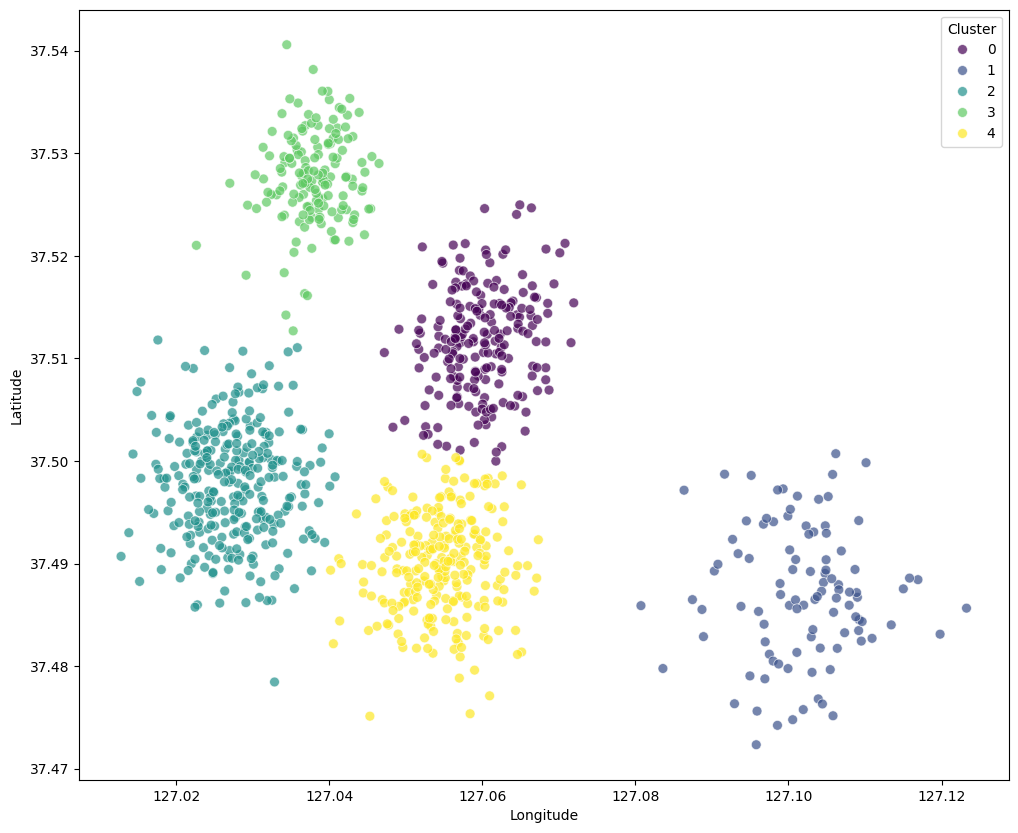

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', s=50, alpha=0.7, legend='full')
plt.show()

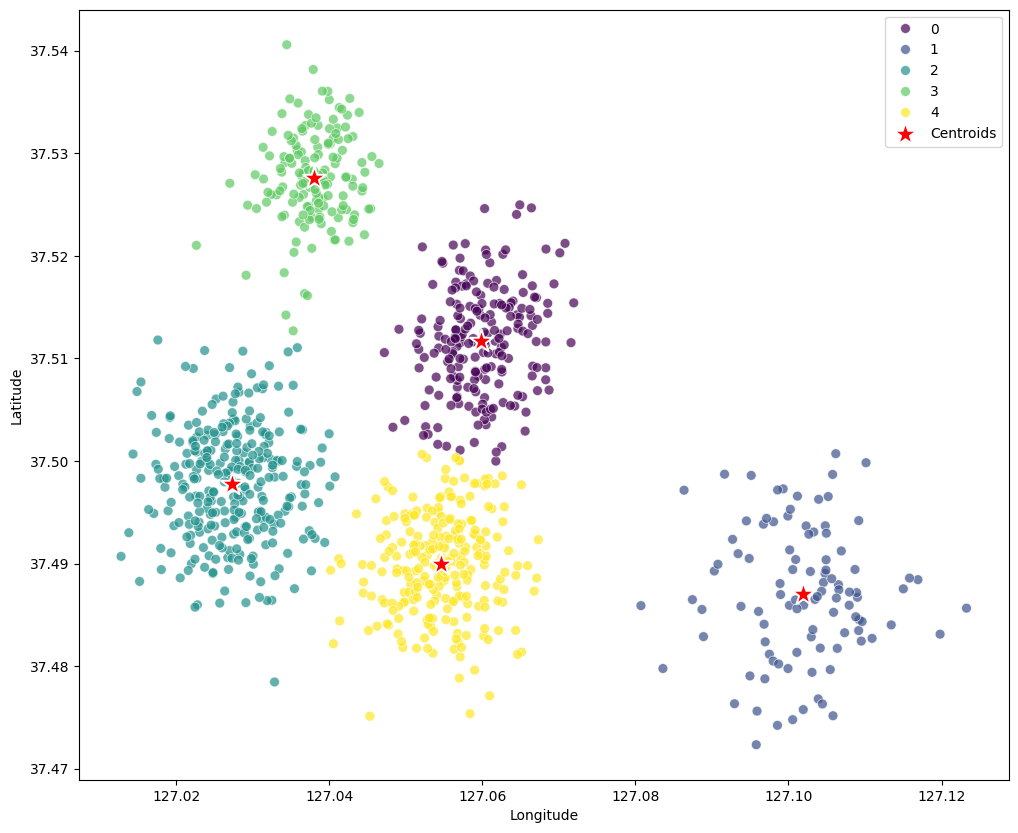

In [16]:
# 시각화 수정
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', s=50, alpha=0.7, legend='full')
# 군집 중심점 추가
sns.scatterplot(data=centers_df, x='Longitude', y='Latitude', color='red', s=300, marker='*', label='Centroids')
plt.legend()
plt.show()

In [ ]:
# 군집 결과 시각화
gangnam_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)
colors = ['red', 'blue', 'green', 'purple', 'orange']
marker_cluster = MarkerCluster().add_to(gangnam_map)
for idx, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        color=colors[row['Cluster']],
                        fill=True,
                        fill_color=colors[row['Cluster']]).add_to(marker_cluster)
gangnam_map
# 군집 중심점 시각화
centers = kmeans.cluster_centers_
for center in centers:
    folium.Marker(location=[center[0], center[1]],
                  icon=folium.Icon(color='black', icon='info-sign')).add_to(gangnam_map)
    
gangnam_map